In [1]:
import tensorflow as tf
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import load_model

import matplotlib.pyplot as plt
import numpy as np

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
img_rows, img_cols = 28, 28

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) # 트레인이미지 전체 개수, 행, 열, 흑백 형태로 reshape 해주고 그걸 x_train에 업데이트 해준다.
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) # 트레인이미지 전체 개수, 행, 열, 흑백 형태로 reshape 해주고 그걸 x_train에 업데이트 해준다.

input_shape = (img_rows, img_cols, 1) # 입력할 형태를 변수에 지정해 준다.

In [28]:
input_shape = (img_rows, img_cols, 1)

In [29]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)


In [31]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [37]:
model = load_model('/content/drive/MyDrive/8_컴퓨터_비전/딥러닝과_컴퓨터비전/[강의교안]_07_Keras를_이용한_CNN 실습/mnist_cnn.h5')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

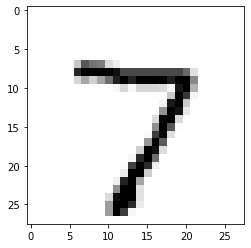

In [39]:
n=0 # 자동화를 위해 초기값 지정
plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest') # 근사치에 점 찍기
plt.show()

In [44]:
model.predict(x_test[n].reshape(1,28,28,1))
# 각각의 예측값이 나왔다.

array([[1.1260488e-12, 1.1305607e-10, 1.5591074e-10, 2.8905378e-09,
        2.2912439e-13, 4.8346765e-13, 2.4887113e-17, 1.0000000e+00,
        5.1980003e-14, 4.0016643e-09]], dtype=float32)

In [42]:
# argmax 는 배열에서 가장 큰 값의 인덱스를 반환한다. 1개씩 28*28 크기, 1채널짜리를 가져와. -1은 현재 배열 기준 가장 마지막 값으로 비교하라는 것
print('answer ', np.argmax(model.predict(x_test[n].reshape((1,28,28,1))), axis=-1))
# model.predict(x_test[n])

answer  [7]


In [45]:
model.predict(x_test)
# 각각의 예측값

array([[1.1260488e-12, 1.1305629e-10, 1.5591074e-10, ..., 1.0000000e+00,
        5.1979806e-14, 4.0016568e-09],
       [4.0692852e-11, 1.8416225e-08, 1.0000000e+00, ..., 4.5320150e-13,
        7.7138800e-13, 8.7362401e-16],
       [1.7720574e-12, 1.0000000e+00, 4.2516488e-09, ..., 4.0876344e-08,
        7.9578504e-09, 8.0788171e-10],
       ...,
       [5.1605222e-21, 2.0859191e-13, 2.3529961e-16, ..., 5.0693685e-12,
        6.1624389e-10, 1.4096703e-10],
       [4.5674863e-11, 3.9247471e-15, 9.4230852e-18, ..., 1.8333412e-15,
        2.4413593e-08, 1.8952342e-13],
       [3.8883319e-12, 1.7884192e-17, 2.4515253e-13, ..., 3.0436863e-19,
        5.3684422e-12, 9.3329796e-16]], dtype=float32)

In [47]:
np.argmax(y_test, axis=1)
# 각각의 배열에서 열 기준으로 최댓값의 인덱스로 라벨링한 것이다.

array([7, 2, 1, ..., 4, 5, 6])

In [48]:
np.argmax(predicted_result, axis=1)
# 참값, 실제값의 label과 비교하여 오차를 구할 수 있다.

array([7, 2, 1, ..., 4, 5, 6])

In [51]:
predicted_result = model.predict(x_test) # 예측값
predicted_labels = np.argmax(predicted_result, axis=1) # 예측값의 label
test_labels = np.argmax(y_test, axis=1) # 실제값의 label

<function matplotlib.pyplot.show>

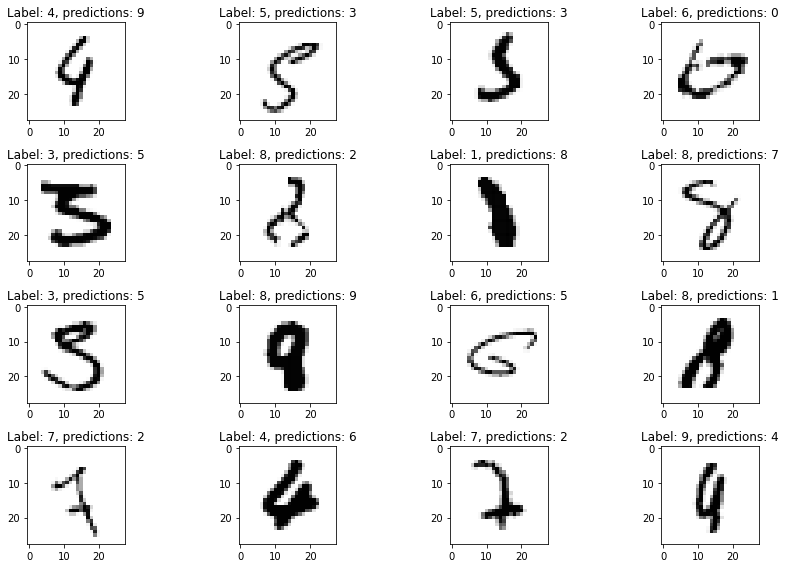

In [53]:
wrong_result = [ ] # 틀린 값을 하나씩 넣을 빈 리스트 만들기

for n in range(0, len(test_labels)): # 처음부터 test_label 길이만큼
  if predicted_labels[n] != test_labels[n]: # 예측값과 실제값의 label 이 다르면
    wrong_result.append(n)

# 그래프로 그릴 때 쓰기 위해 사용함
count = 0
nrows = 4
ncols = 4

plt.figure(figsize=(12,8))

# worng_result 쭉 뽑기
for n in wrong_result:
  count += 1
  plt.subplot(nrows, ncols, count)
  plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  # 고급 기법, title 을 자동화하는 코드이다.
  tmp = 'Label: ' + str(test_labels[n]) + ", predictions: " + str(predicted_labels[n])
  plt.title(tmp)

  if count == 16: 
    break

plt.tight_layout()
plt.show

Convolution

출력 볼륨의 크기 (가로/세로)는 입력 볼륨 크기 (W), CONV 레이어의 receptive field 크기(F)와 stride (S),
그리고 제로 패딩 (zero-padding) 사이즈 (P) 의 함수로 계산할 수 있다.

공식

W = 227
F = 11
P = 0
S = 4

(W-F+2*P)/(S+1)